In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/final_internship_data.csv')

In [ ]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df.shape

(500000, 26)

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [ ]:
df.isna().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [ ]:
df.nunique()

,0
User ID,500000
User Name,221675
Driver Name,221700
Car Condition,4
Weather,5
Traffic Condition,3
key,500000
fare_amount,1688
pickup_datetime,461206
pickup_longitude,95037


In [ ]:
df.nunique(), df.isna().sum()

(User ID              500000
 User Name            221675
 Driver Name          221700
 Car Condition             4
 Weather                   5
 Traffic Condition         3
 key                  500000
 fare_amount            1688
 pickup_datetime      461206
 pickup_longitude      95037
 pickup_latitude      119115
 dropoff_longitude    108283
 dropoff_latitude     135053
 passenger_count           7
 hour                     24
 day                      31
 month                    12
 weekday                   7
 year                      7
 jfk_dist             490613
 ewr_dist             490613
 lga_dist             490613
 sol_dist             490613
 nyc_dist             490613
 distance             485705
 bearing              485636
 dtype: int64,
 User ID              0
 User Name            0
 Driver Name          0
 Car Condition        0
 Weather              0
 Traffic Condition    0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitu

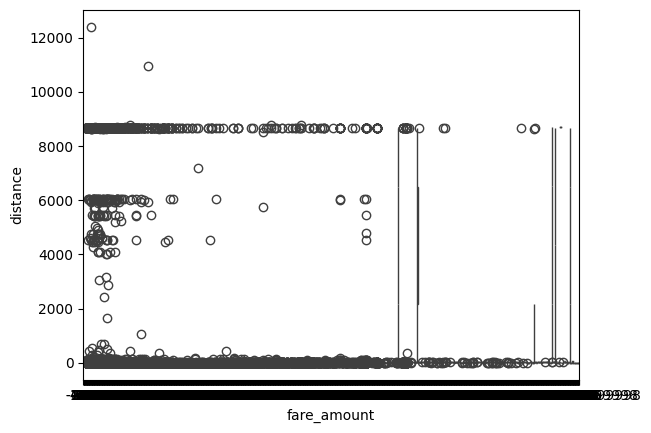

In [ ]:
sns.boxplot( x="fare_amount", y='distance', data=df, )
plt.show()

In [ ]:
# prompt: i want to know if there is a row has more than 1 null value

# Check if any row has more than 1 null value
rows_with_multiple_nulls = df[df.isnull().sum(axis=1) > 1]

if not rows_with_multiple_nulls.empty:
  print("There are rows with more than one null value.")
  print(rows_with_multiple_nulls)
else:
  print("No rows have more than one null value.")


There are rows with more than one null value.
         User ID       User Name     Driver Name Car Condition Weather  \
120227  BOLML7gg       Carol Kim      John Scott     Very Good   rainy   
245696  AA838qgm      Mark Jones  Christy Taylor           Bad   windy   
340533  BqrlHUr2  Joshua Mullins      Sarah Khan     Excellent  cloudy   
428108  rL4WTHGq   Richard Brown   Rachel Miller     Very Good  cloudy   
471472  tKIOKS8Y      Larry Wade  Howard Jackson          Good   windy   

        Traffic Condition                           key  fare_amount  \
120227      Dense Traffic  2012-12-11 12:57:00.00000013         12.5   
245696      Dense Traffic   2013-03-21 18:07:07.0000001         86.5   
340533      Dense Traffic  2012-12-11 12:50:52.00000010         27.5   
428108       Flow Traffic   2011-09-08 09:12:52.0000001         11.8   
471472  Congested Traffic   2012-12-11 12:34:20.0000006          7.8   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \


In [ ]:
 rows_with_multiple_nulls

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
120227,BOLML7gg,Carol Kim,John Scott,Very Good,rainy,Dense Traffic,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00,-1.291417,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245696,AA838qgm,Mark Jones,Christy Taylor,Bad,windy,Dense Traffic,2013-03-21 18:07:07.0000001,86.5,2013-03-21 18:07:07,-1.291397,...,3,3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340533,BqrlHUr2,Joshua Mullins,Sarah Khan,Excellent,cloudy,Dense Traffic,2012-12-11 12:50:52.00000010,27.5,2012-12-11 12:50:52,-1.291188,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428108,rL4WTHGq,Richard Brown,Rachel Miller,Very Good,cloudy,Flow Traffic,2011-09-08 09:12:52.0000001,11.8,2011-09-08 09:12:52,-1.291317,...,9,3,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471472,tKIOKS8Y,Larry Wade,Howard Jackson,Good,windy,Congested Traffic,2012-12-11 12:34:20.0000006,7.8,2012-12-11 12:34:20,0.000000,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: i want to delete these two rows

# Delete rows with more than one null value
df = df.dropna(thresh=len(df.columns)-1)

# Print the shape of the updated DataFrame to check the number of rows and columns
df.shape


(499995, 26)

In [ ]:
df.isna().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [ ]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [ ]:
 df['Traffic Condition'].value_counts(normalize=True)*100

,proportion
Traffic Condition,
Congested Traffic,33.369534
Dense Traffic,33.316533
Flow Traffic,33.313933


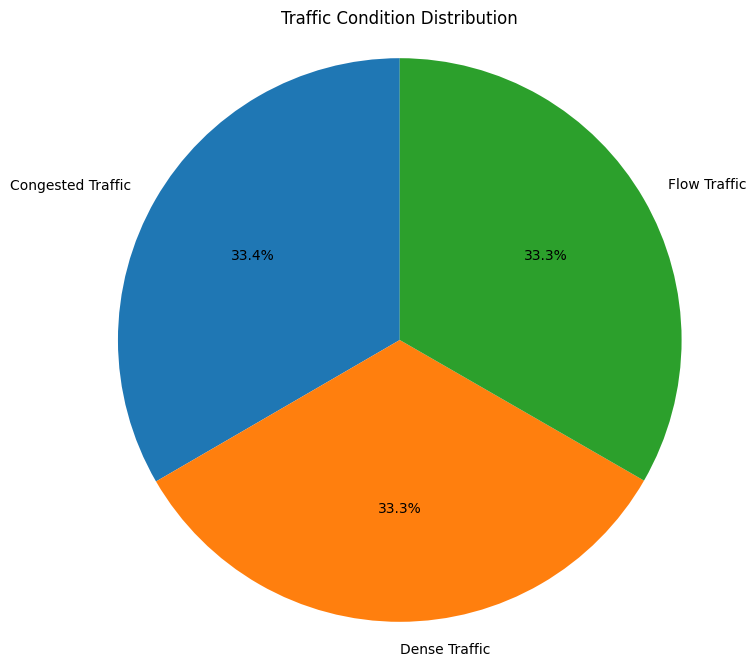

In [ ]:
# prompt: pie chart for traffic condition

import matplotlib.pyplot as plt

traffic_counts = df['Traffic Condition'].value_counts()
labels = traffic_counts.index
sizes = traffic_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Traffic Condition Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
 df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.692025
2,0.147817
5,0.070645
3,0.043522
4,0.021228
6,0.021180
0,0.003582


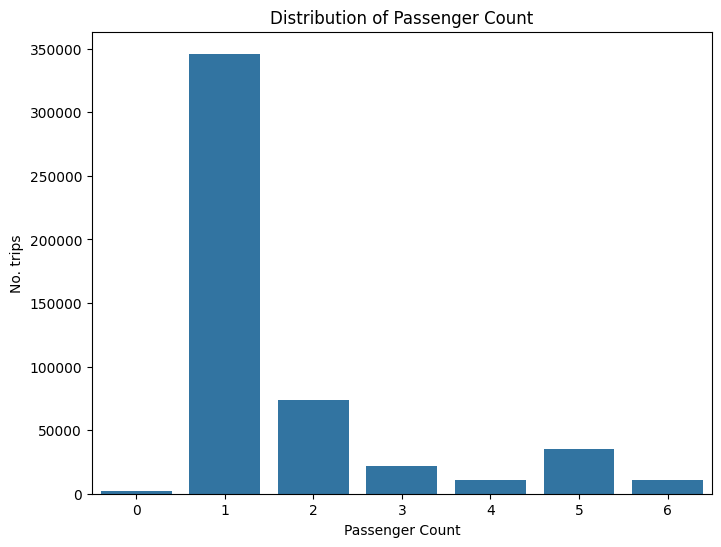

In [ ]:
# prompt: draw a chart for  passenger count

import matplotlib.pyplot as plt
passenger_counts = df['passenger_count'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values)
plt.xlabel('Passenger Count')
plt.ylabel('No. trips')
plt.title('Distribution of Passenger Count')
plt.show()


In [ ]:
 df['Car Condition'].value_counts(normalize=True)

,proportion
Car Condition,
Very Good,0.250623
Bad,0.249956
Good,0.249936
Excellent,0.249484


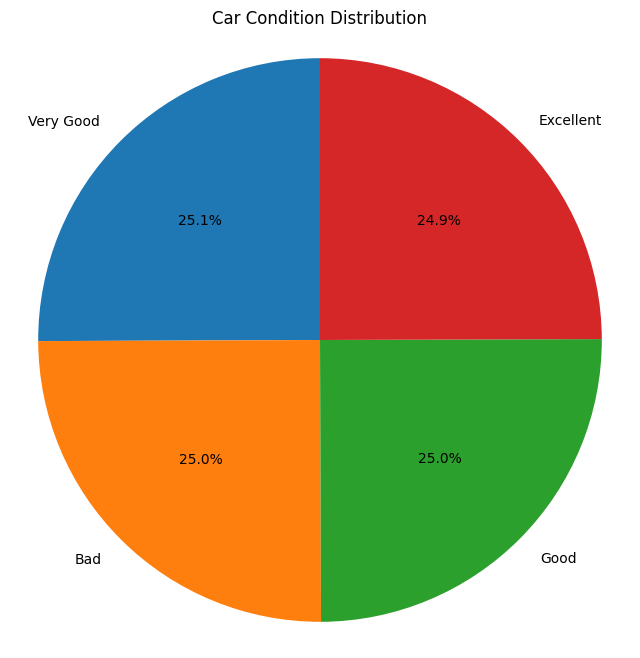

In [ ]:
# prompt: pie chart for car condition

import matplotlib.pyplot as plt
car_condition_counts = df['Car Condition'].value_counts()
labels = car_condition_counts.index
sizes = car_condition_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Car Condition Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
df['Weather'].value_counts(normalize=True)

,proportion
Weather,
sunny,0.200868
cloudy,0.200122
rainy,0.199944
stormy,0.199912
windy,0.199154


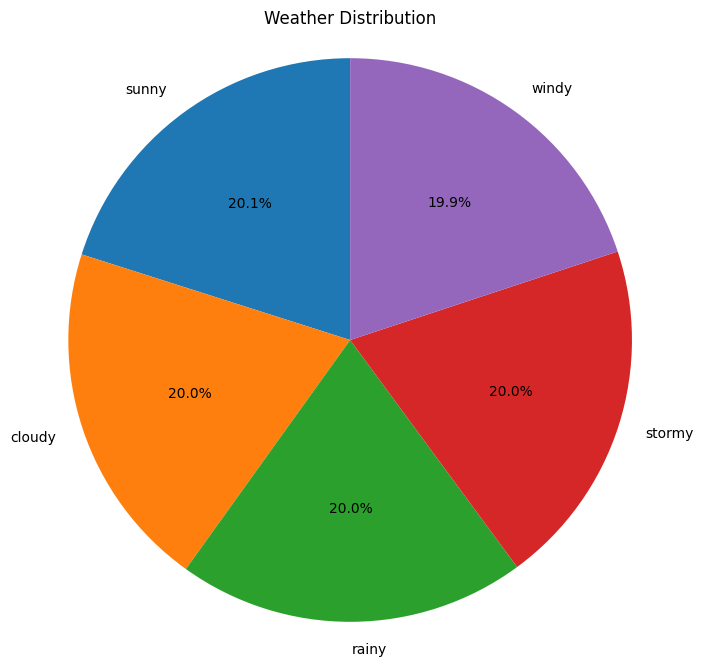

In [ ]:
# prompt: pie chart for weather

import matplotlib.pyplot as plt
weather_counts = df['Weather'].value_counts()
labels = weather_counts.index
sizes = weather_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Weather Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
df['fare_amount'].describe()

,fare_amount
count,499995.000000
mean,11.358182
std,9.916069
min,-44.900000
25%,6.000000
50%,8.500000
75%,12.500000
max,500.000000


In [ ]:
df['distance'].describe()

,distance
count,499995.000000
mean,19.468775
std,367.299601
min,0.000000
25%,1.214550
50%,2.116970
75%,3.890070
max,12399.956433


In [ ]:
df['key'].value_counts(normalize=True)

,proportion
key,
2009-06-15 17:26:21.0000001,0.000002
2013-07-02 11:58:45.0000001,0.000002
2011-12-20 12:07:38.0000004,0.000002
2009-10-14 20:20:00.00000025,0.000002
2013-01-23 19:07:52.0000003,0.000002
...,...
2010-04-05 17:26:00.00000013,0.000002
2014-07-23 09:10:31.0000005,0.000002
2014-06-23 07:31:16.0000004,0.000002


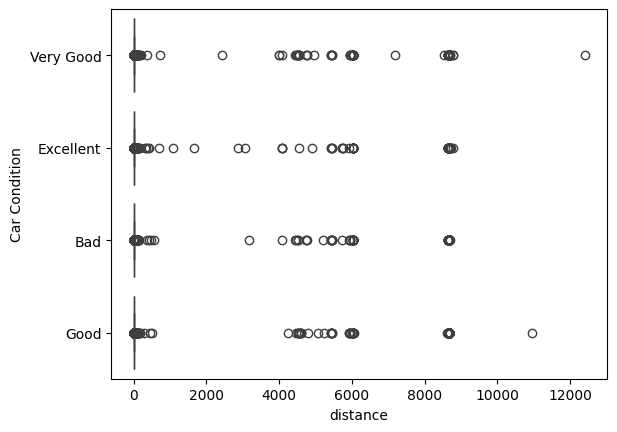

In [ ]:
sns.boxplot( x="distance", y='Car Condition', data=df, )
plt.show()

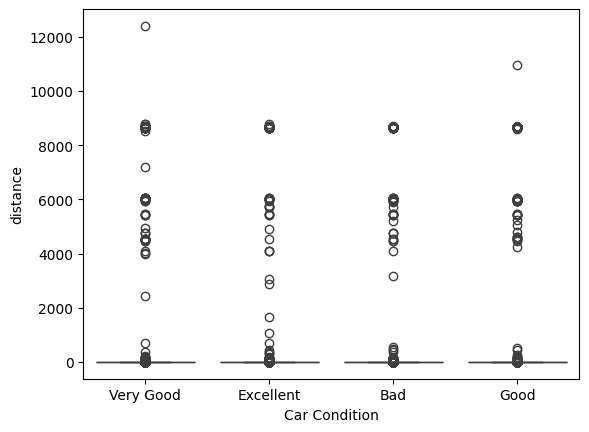

In [ ]:
#fare_amount
sns.boxplot( x="Car Condition", y='distance', data=df, )
plt.show()

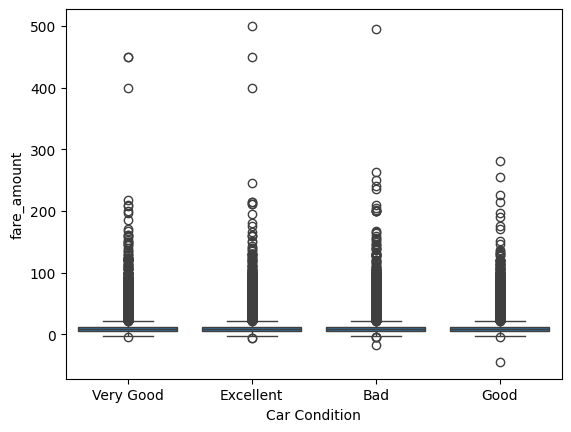

In [ ]:
sns.boxplot( x="Car Condition", y='fare_amount', data=df, )
plt.show()

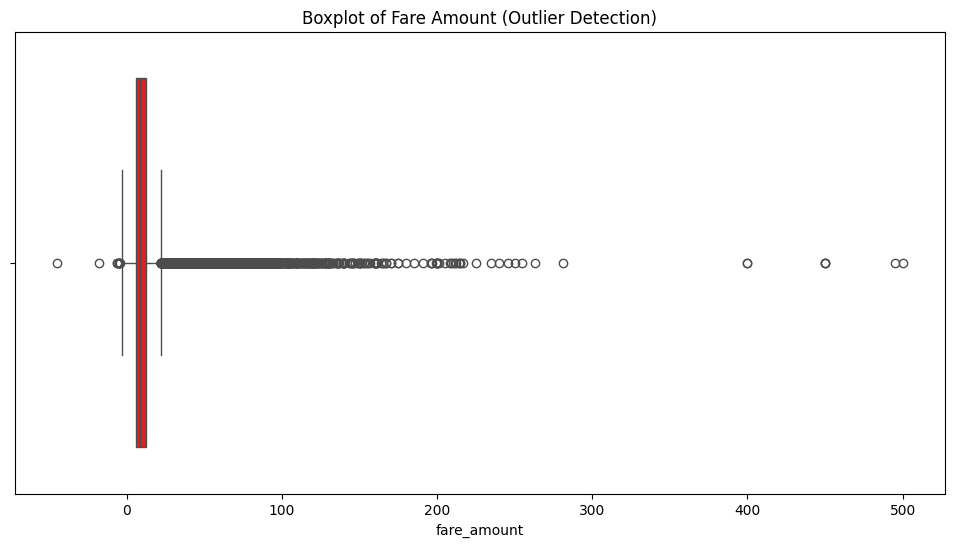

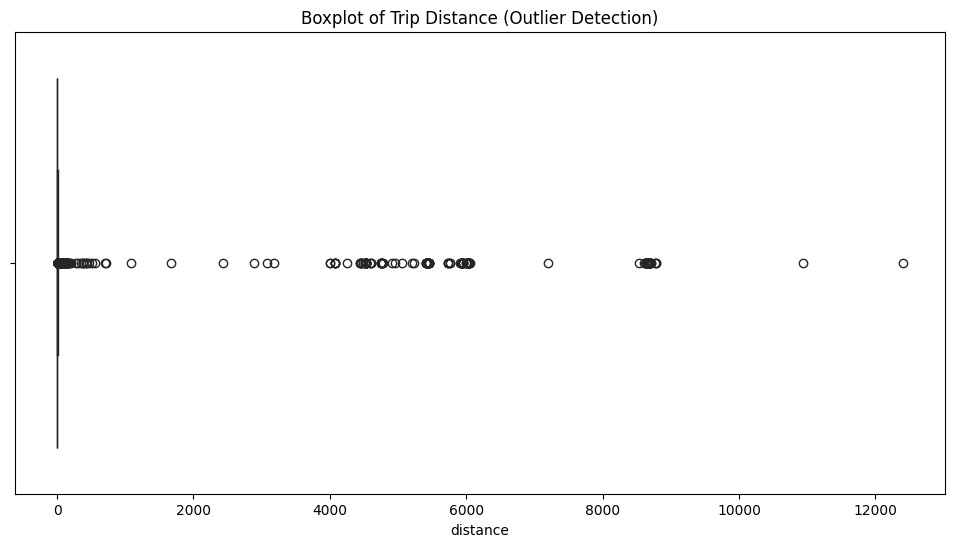

In [ ]:
# Detect Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["fare_amount"], color="red")
plt.title("Boxplot of Fare Amount (Outlier Detection)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["distance"], color="green")
plt.title("Boxplot of Trip Distance (Outlier Detection)")
plt.show()


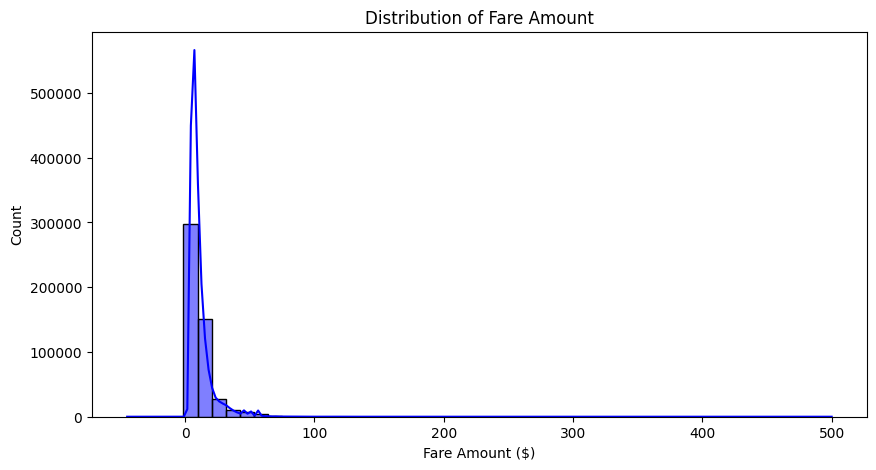

In [ ]:
# Plot Fare Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True, color="blue")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.title("Distribution of Fare Amount")
plt.show()

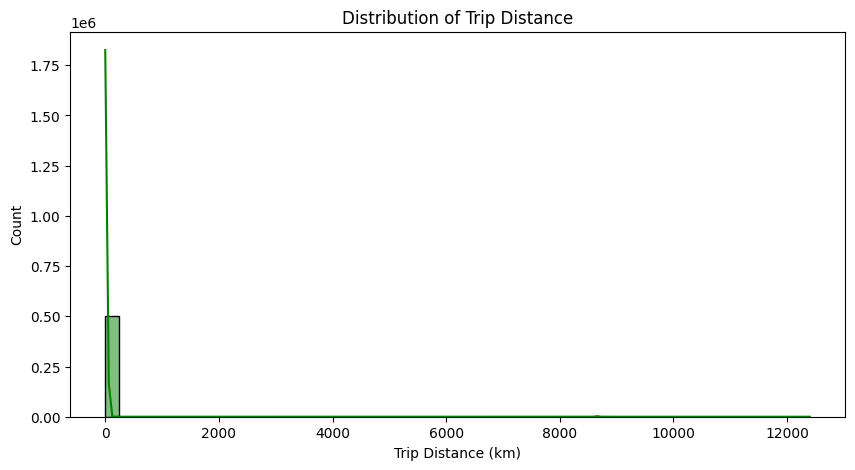

In [ ]:
# Plot Trip Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["distance"], bins=50, kde=True, color="green")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Count")
plt.title("Distribution of Trip Distance")
plt.show()

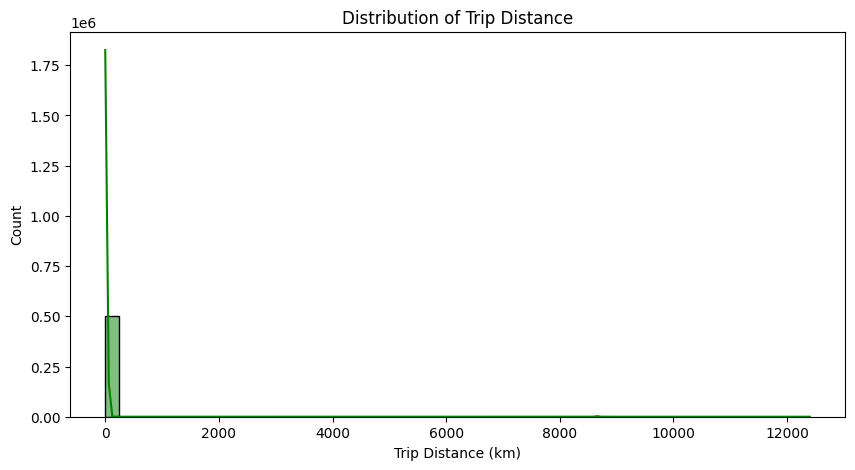

In [ ]:
# Plot Trip Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["distance"], bins=50, kde=True, color="green")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Count")
plt.title("Distribution of Trip Distance")
plt.show()

<ipython-input-142-e13481c848d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather", y="fare_amount", data=df, palette="coolwarm")


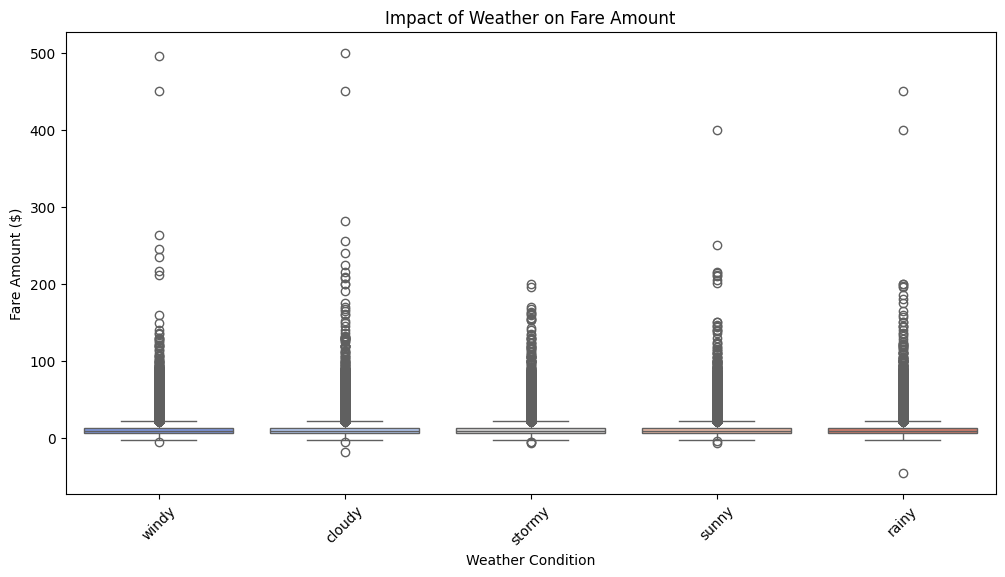

In [ ]:
# Boxplot for Fare Amount vs Weather
plt.figure(figsize=(12, 6))
sns.boxplot(x="Weather", y="fare_amount", data=df, palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Impact of Weather on Fare Amount")
plt.xticks(rotation=45)
plt.show()

<ipython-input-143-e5940fa71c70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Traffic Condition", y="fare_amount", data=df, palette="magma")


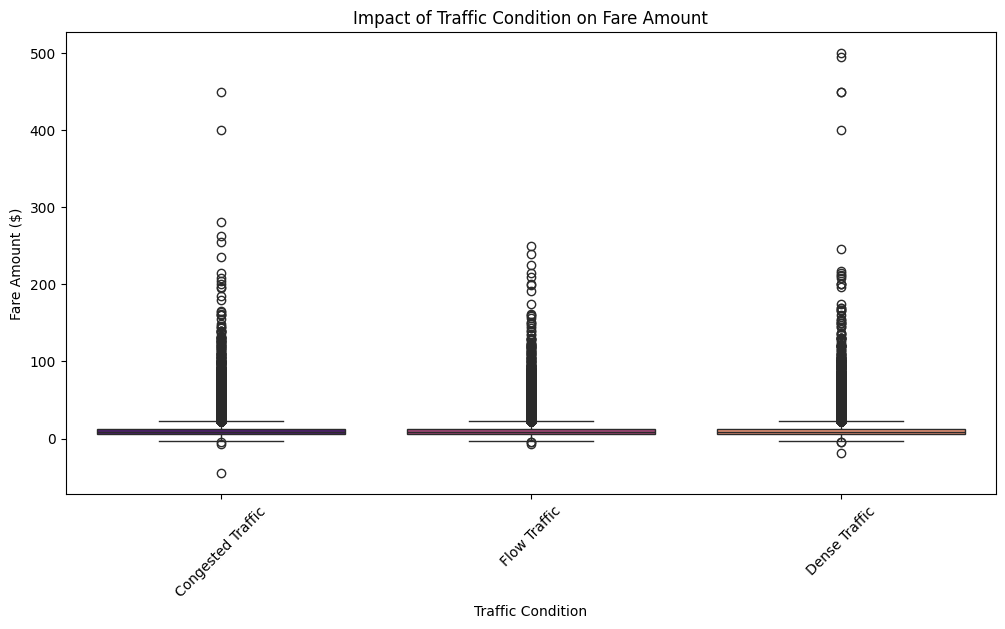

In [ ]:
# Boxplot for Fare Amount vs Traffic
plt.figure(figsize=(12, 6))
sns.boxplot(x="Traffic Condition", y="fare_amount", data=df, palette="magma")
plt.xlabel("Traffic Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Impact of Traffic Condition on Fare Amount")
plt.xticks(rotation=45)
plt.show()

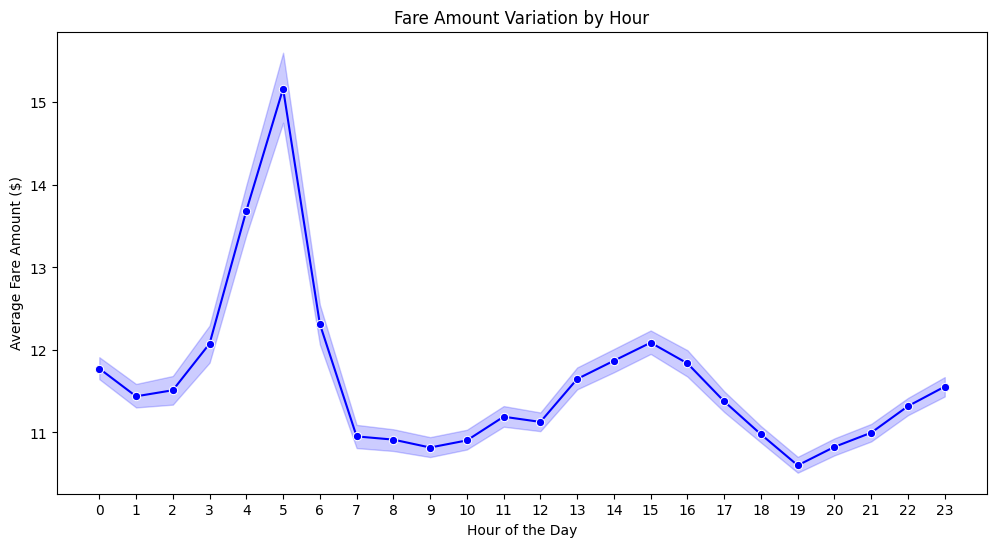

In [ ]:
# Line Plot for Hourly Fare Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="fare_amount", data=df, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Amount ($)")
plt.title("Fare Amount Variation by Hour")
plt.xticks(range(0, 24))
plt.show()

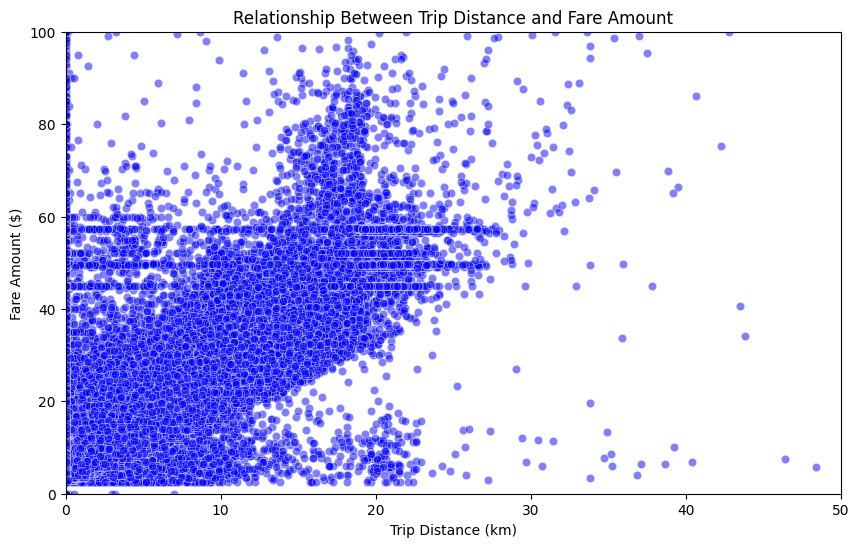

In [ ]:
# Scatter Plot for Distance vs Fare Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["distance"], y=df["fare_amount"], alpha=0.5, color="blue")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.show()

<ipython-input-146-532913a4390d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="passenger_count", y="fare_amount", data=df, palette="viridis")


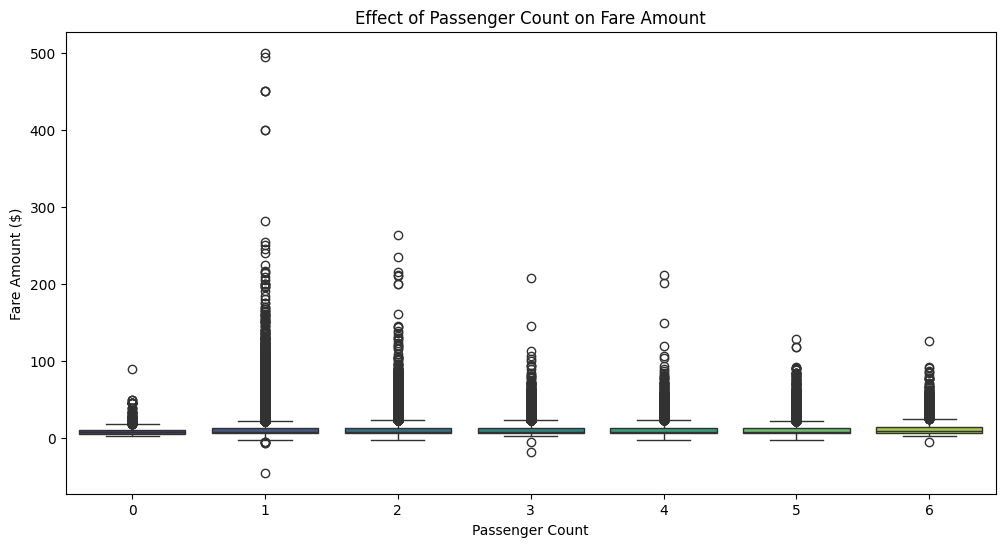

In [ ]:
# Impact of Passenger Count on Fare Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x="passenger_count", y="fare_amount", data=df, palette="viridis")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Effect of Passenger Count on Fare Amount")
plt.show()

<ipython-input-147-3e5965e85165>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Car Condition", y="fare_amount", data=df, palette="Set2")


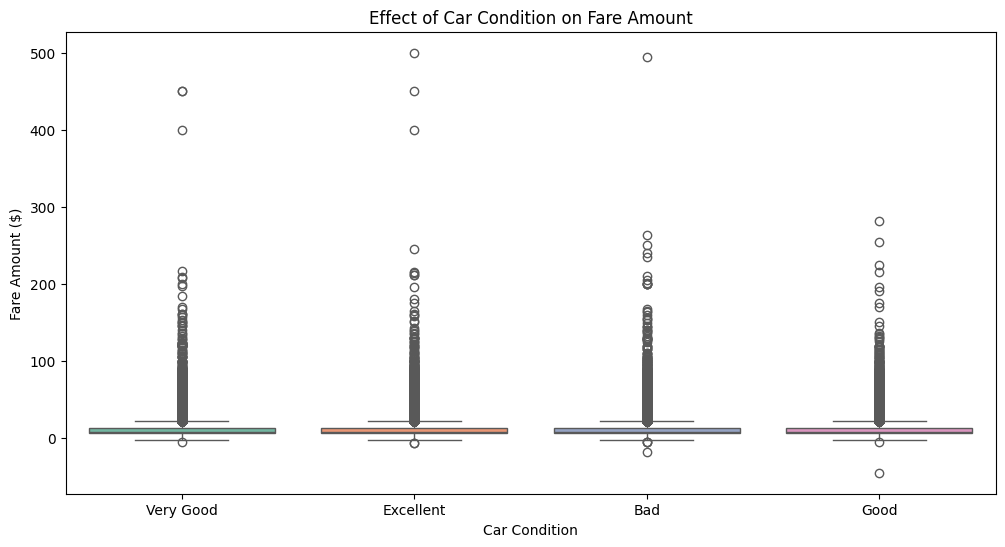

In [ ]:
# Impact of Car Condition on Fare Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x="Car Condition", y="fare_amount", data=df, palette="Set2")
plt.xlabel("Car Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Effect of Car Condition on Fare Amount")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


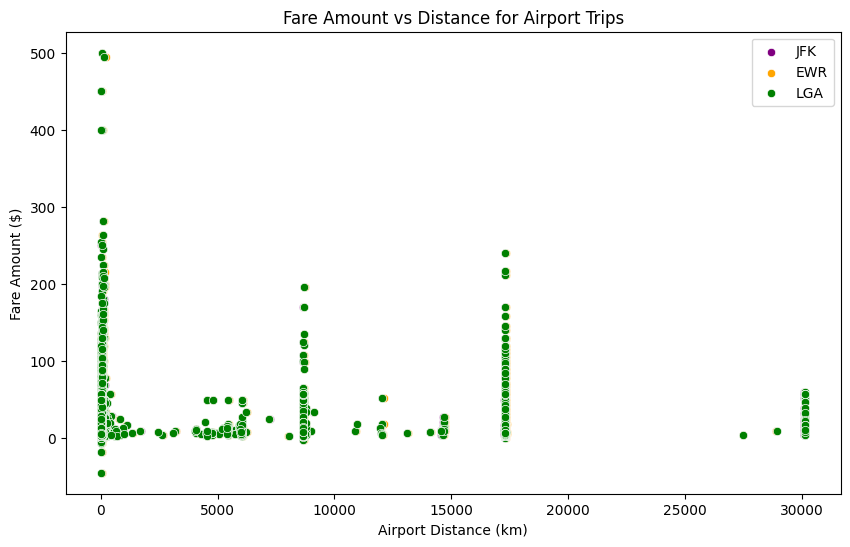

In [ ]:
# Distance vs Fare for Airport Trips
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["jfk_dist"], y=df["fare_amount"], color="purple", label="JFK")
sns.scatterplot(x=df["ewr_dist"], y=df["fare_amount"], color="orange", label="EWR")
sns.scatterplot(x=df["lga_dist"], y=df["fare_amount"], color="green", label="LGA")
plt.xlabel("Airport Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Distance for Airport Trips")
plt.legend()
plt.show()

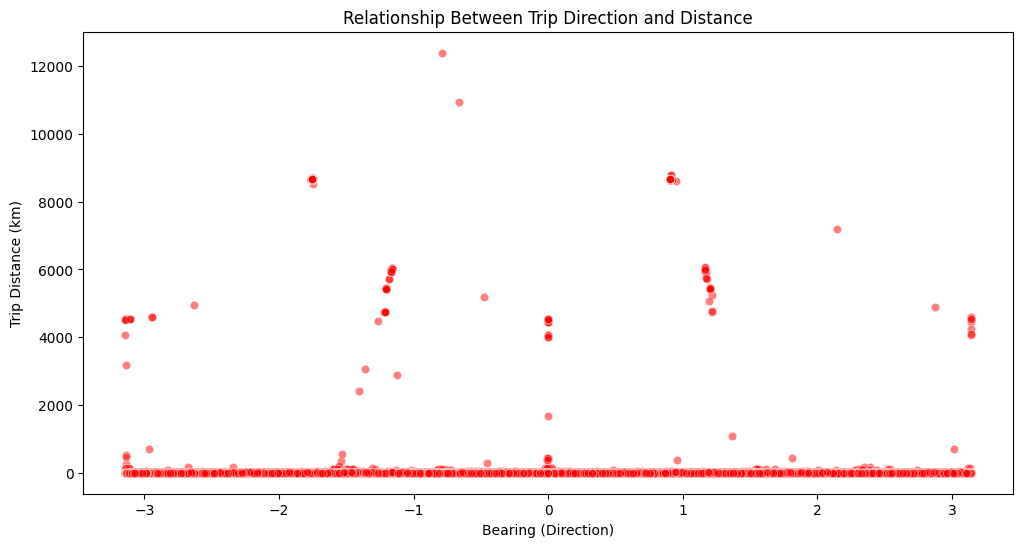

In [ ]:
# Effect of Bearing (Trip Direction) on Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["bearing"], y=df["distance"], alpha=0.5, color="red")
plt.xlabel("Bearing (Direction)")
plt.ylabel("Trip Distance (km)")
plt.title("Relationship Between Trip Direction and Distance")
plt.show()


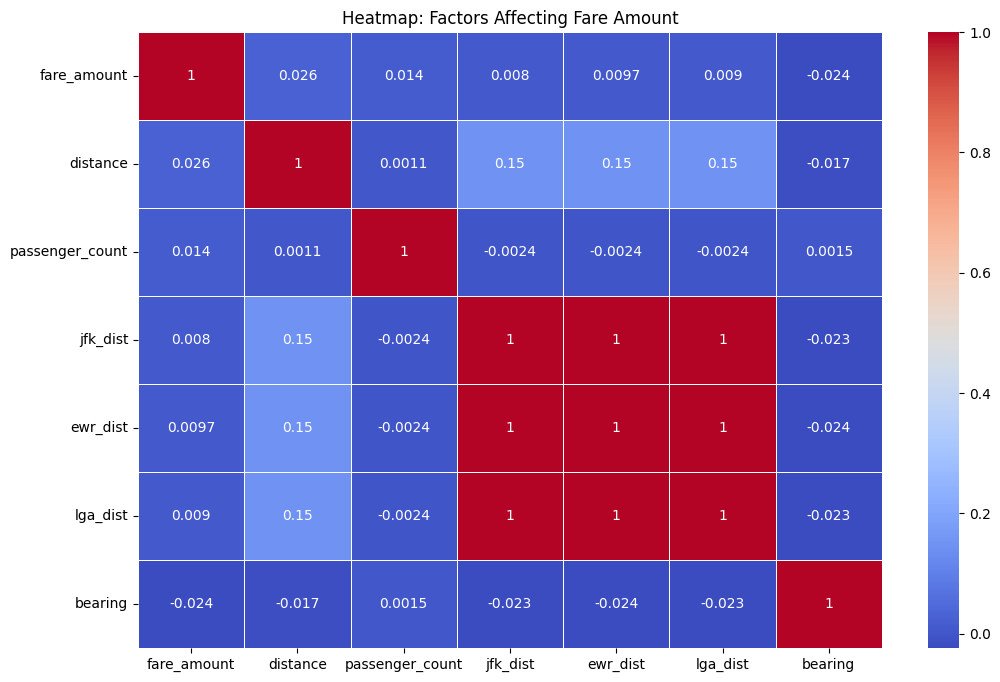

In [ ]:
# prompt: Correlation Heatmap for Fare Amount

import matplotlib.pyplot as plt
# Correlation Heatmap for Fare Amount
# Heatmap to analyze which factors impact Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing"]
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()


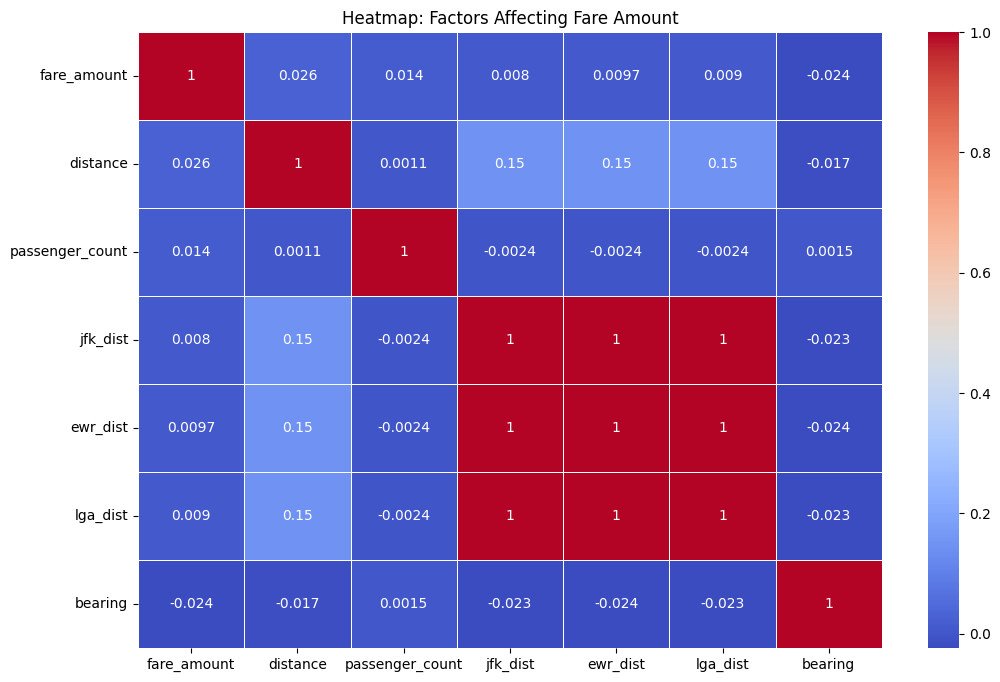

In [ ]:
# prompt: Correlation Heatmap for Fare Amount

import matplotlib.pyplot as plt
# Correlation Heatmap for Fare Amount
# Heatmap to analyze which factors impact Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing"]
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()


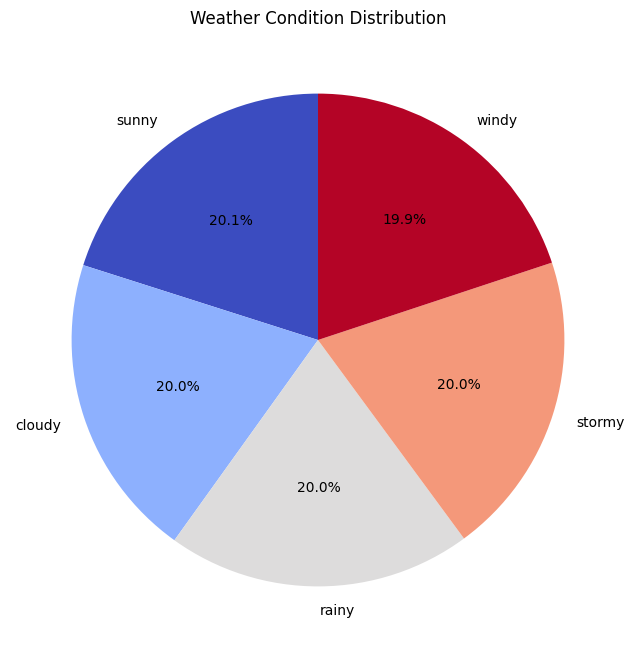

Average Fare Amount per Weather Condition:
 Weather
cloudy    11.379863
rainy     11.357863
stormy    11.346383
sunny     11.358210
windy     11.348532
Name: fare_amount, dtype: float64
Average Fare Amount per Traffic Condition:
 Traffic Condition
Congested Traffic    11.390549
Dense Traffic        11.367565
Flow Traffic         11.316378
Name: fare_amount, dtype: float64


In [ ]:
# Pie Chart for Weather Condition
plt.figure(figsize=(8, 8))
df["Weather"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Weather Condition Distribution")
plt.ylabel("")
plt.show()

# Average Fare Amount for Each Weather Condition
print("Average Fare Amount per Weather Condition:\n", df.groupby("Weather")["fare_amount"].mean())

# Average Fare Amount for Each Traffic Condition
print("Average Fare Amount per Traffic Condition:\n", df.groupby("Traffic Condition")["fare_amount"].mean())


In [ ]:
# prompt: drop all users and driver name

# Assuming 'df' is your DataFrame as defined in the previous code.
# Drop the 'User ID' and 'Driver ID' columns if they exist.

if 'User Name' in df.columns:
    df = df.drop('User Name', axis=1)
if 'Driver Name' in df.columns:
    df = df.drop('Driver Name', axis=1)
if 'key' in df.columns:
  df = df.drop('key', axis = 1)
# Print the updated DataFrame to verify the changes.
print(df.head())


    User ID Car Condition Weather  Traffic Condition  fare_amount  \
0  KHVrEVlD     Very Good   windy  Congested Traffic          4.5   
1  lPxIuEri     Excellent  cloudy       Flow Traffic         16.9   
2  gsVN8JLS           Bad  stormy  Congested Traffic          5.7   
3  9I7kWFgd     Very Good  stormy       Flow Traffic          7.7   
4  8QN5ZaGN           Bad  stormy  Congested Traffic          5.3   

       pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0  2009-06-15 17:26:21         -1.288826         0.710721          -1.288779   
1  2010-01-05 16:52:16         -1.291824         0.710546          -1.291182   
2  2011-08-18 00:35:00         -1.291242         0.711418          -1.291391   
3  2012-04-21 04:30:42         -1.291319         0.710927          -1.291396   
4  2010-03-09 07:51:00         -1.290987         0.711536          -1.290787   

   dropoff_latitude  ...  month  weekday  year   jfk_dist   ewr_dist  \
0          0.710563  ...      6 

In [ ]:
# prompt: label encoder for car condition , weather and  Traffic Condition

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Car Condition' column
df['Car Condition'] = le.fit_transform(df['Car Condition'])
print(df['Car Condition'].nunique())
# Fit and transform the 'Weather' column
df['Weather'] = le.fit_transform(df['Weather'])
print(df['Weather'].nunique())
# Fit and transform the 'Traffic Condition' column
df['Traffic Condition'] = le.fit_transform(df['Traffic Condition'])
print(df['Traffic Condition'].nunique())


4
5
3


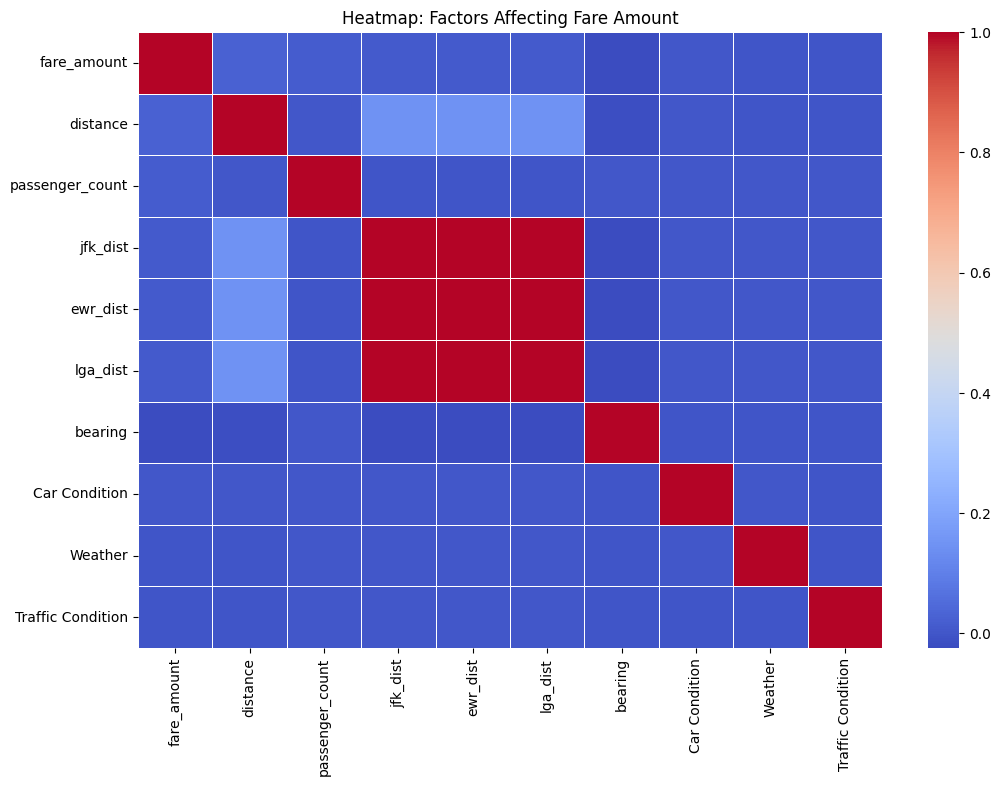

In [ ]:
# prompt: heat map for fare amount

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already preprocessed as in your provided code.

# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()


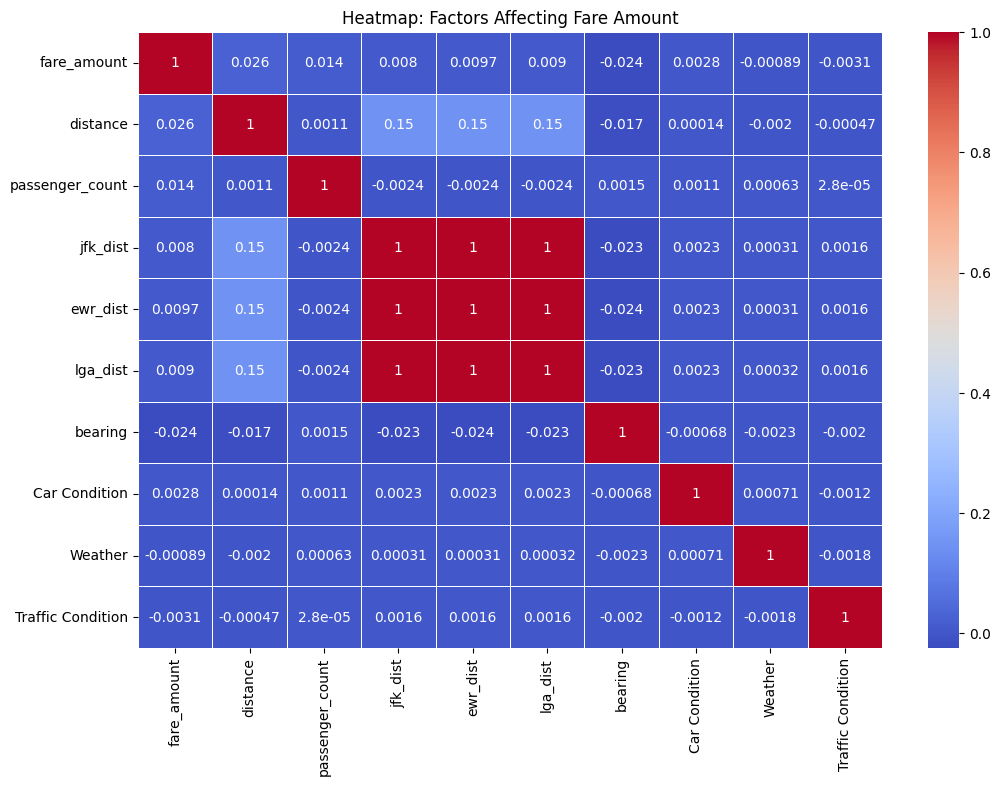

In [ ]:
# prompt: heat map for fare amount

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already preprocessed as in your provided code.

# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

In [ ]:
# prompt: fix outliers

import numpy as np
# Assuming 'df' is your DataFrame and 'fare_amount' and 'distance' are columns you want to fix.

def fix_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

df = fix_outliers_iqr(df, 'fare_amount')
df = fix_outliers_iqr(df, 'distance')


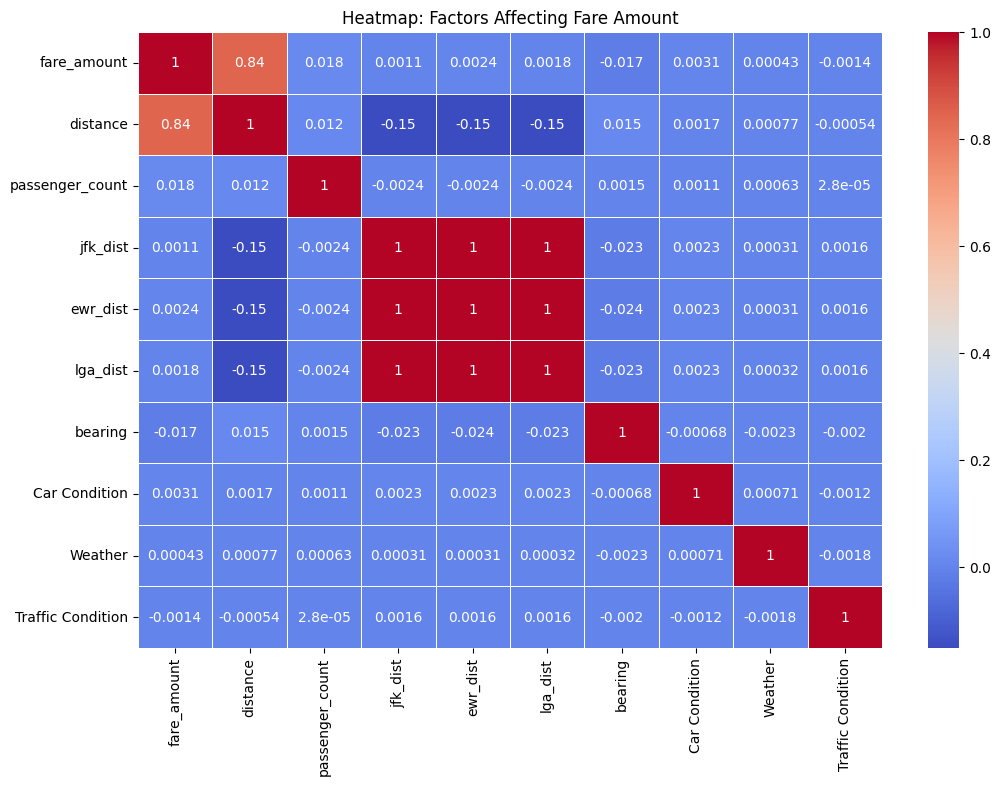

In [ ]:
# prompt: heat map for fare amount

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already preprocessed as in your provided code.

# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

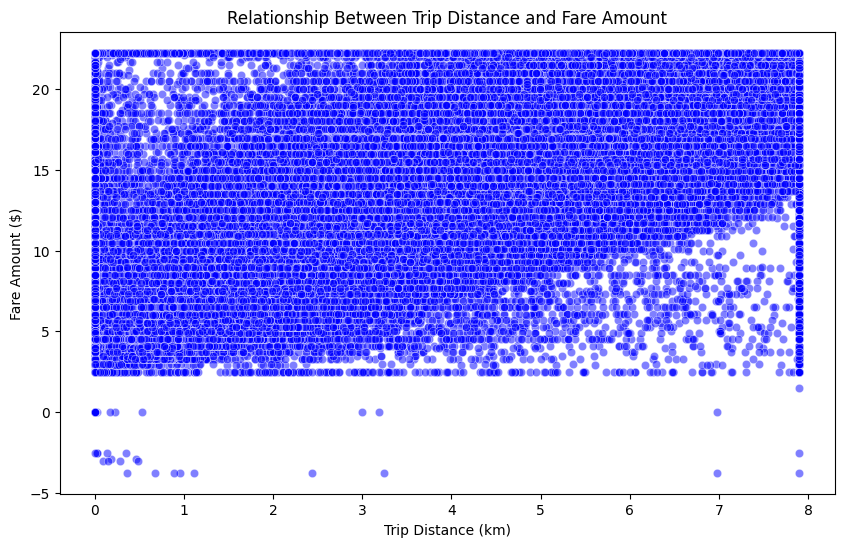

In [ ]:
# prompt: fare amount  vs distance chart

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["distance"], y=df["fare_amount"], alpha=0.5, color="blue")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.show()


In [ ]:
#fare_amount
#sns.boxplot( x="Car Condition", y='distance', data=df, )
#plt.show()

In [ ]:
#sns.boxplot( x="Car Condition", y='fare_amount', data=df, )
#plt.show()

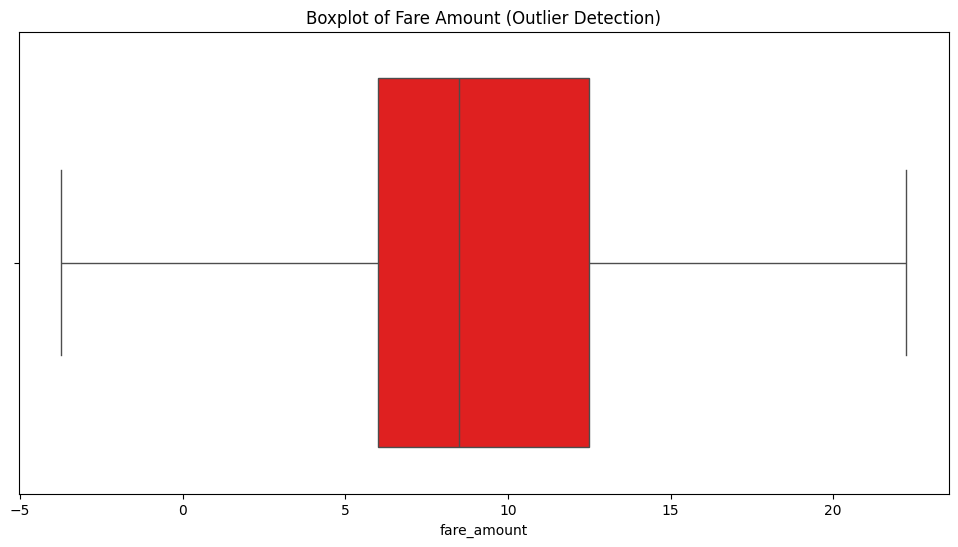

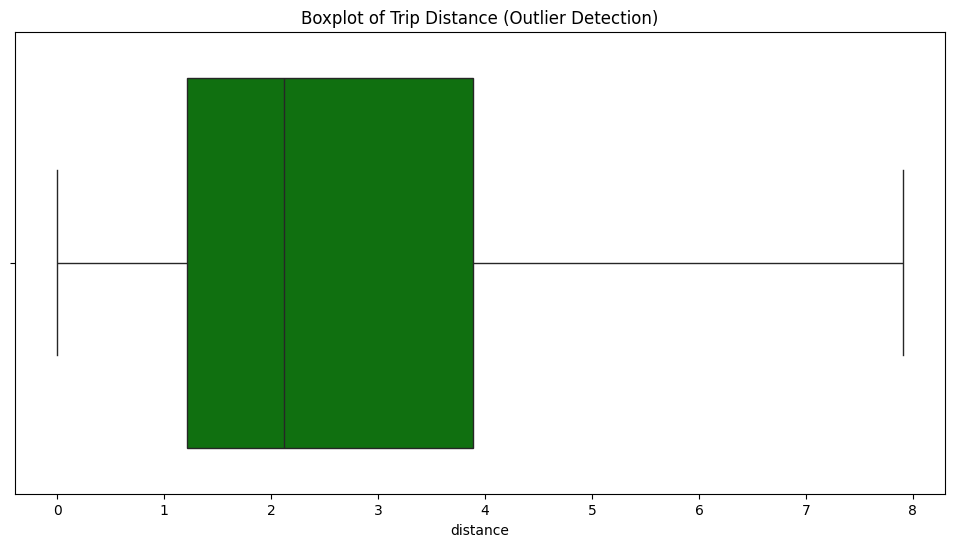

In [ ]:
# Detect Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["fare_amount"], color="red")
plt.title("Boxplot of Fare Amount (Outlier Detection)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["distance"], color="green")
plt.title("Boxplot of Trip Distance (Outlier Detection)")
plt.show()


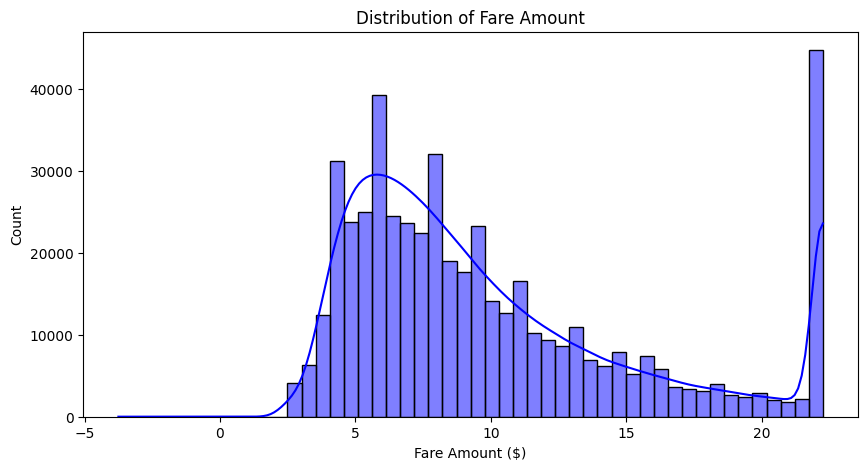

In [ ]:
# Plot Fare Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True, color="blue")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.title("Distribution of Fare Amount")
plt.show()

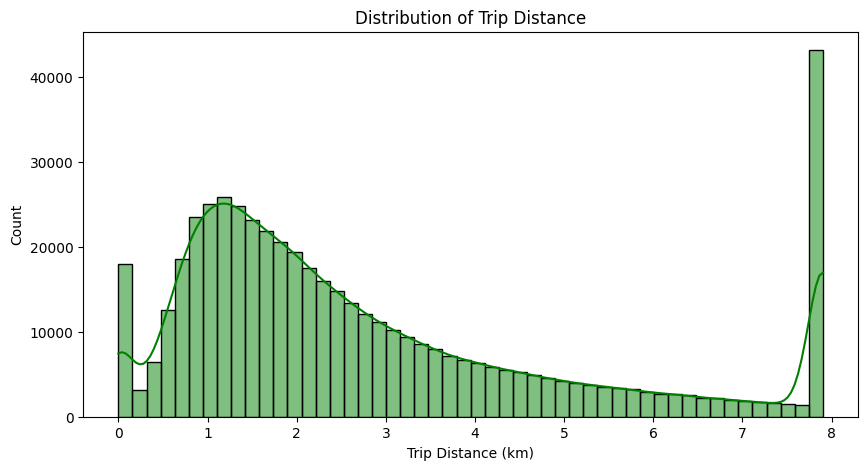

In [ ]:
# Plot Trip Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["distance"], bins=50, kde=True, color="green")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Count")
plt.title("Distribution of Trip Distance")
plt.show()

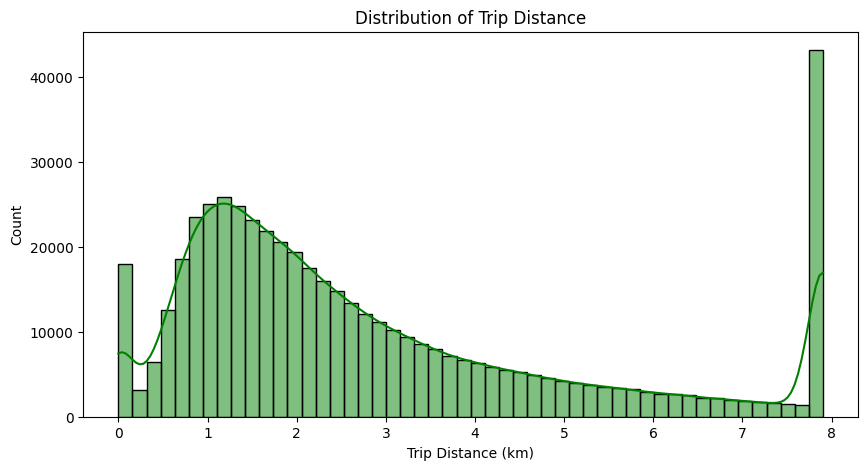

In [ ]:
# Plot Trip Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["distance"], bins=50, kde=True, color="green")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Count")
plt.title("Distribution of Trip Distance")
plt.show()

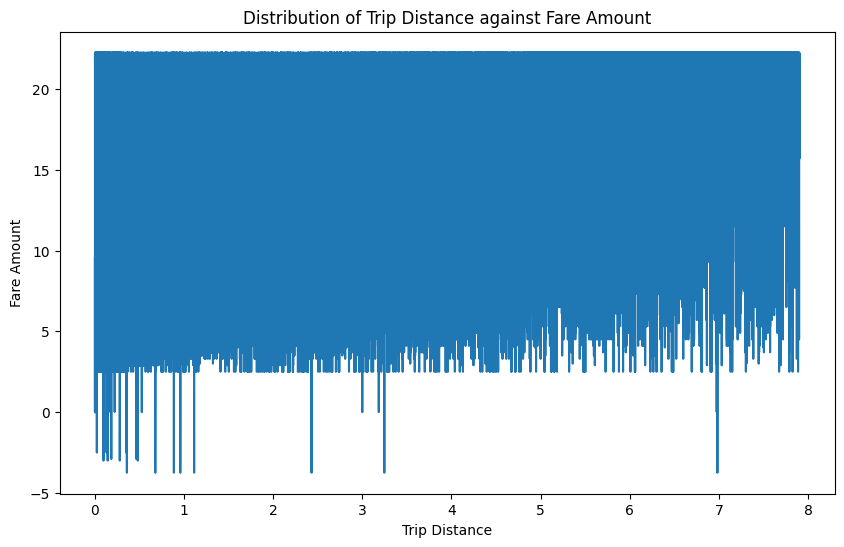

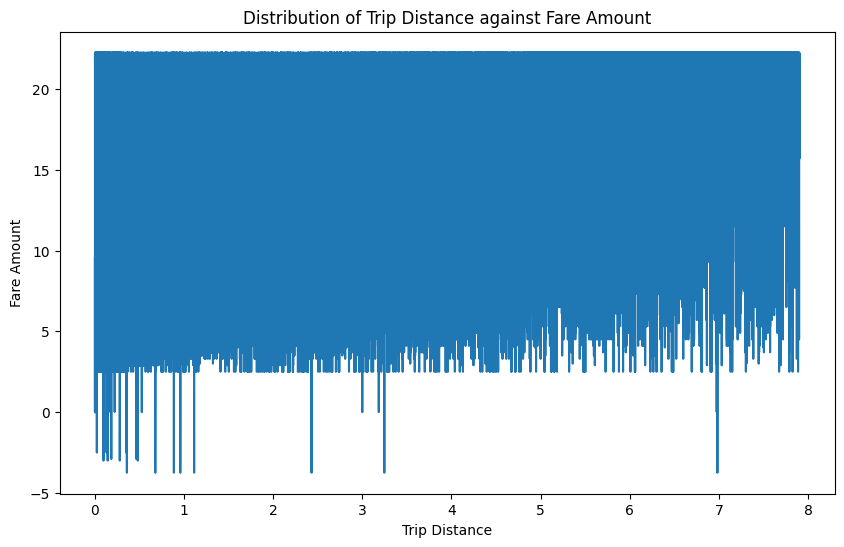

In [ ]:
# prompt: distribution of trip distance against fare amount use matplot use line graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x="distance", y="fare_amount", data=df)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Distribution of Trip Distance against Fare Amount")
plt.show()


<ipython-input-166-e13481c848d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather", y="fare_amount", data=df, palette="coolwarm")


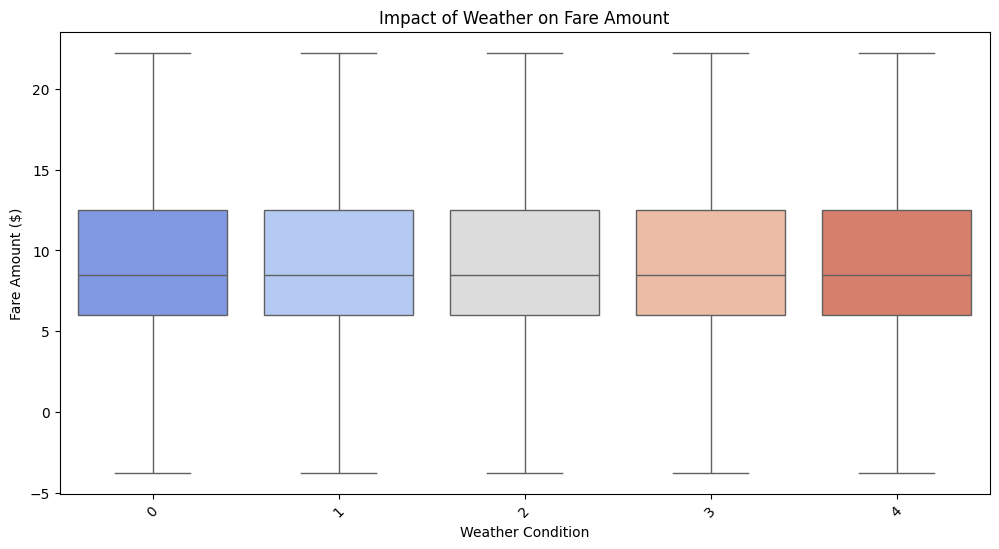

In [ ]:
# Boxplot for Fare Amount vs Weather
plt.figure(figsize=(12, 6))
sns.boxplot(x="Weather", y="fare_amount", data=df, palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Impact of Weather on Fare Amount")
plt.xticks(rotation=45)
plt.show()

<ipython-input-167-e5940fa71c70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Traffic Condition", y="fare_amount", data=df, palette="magma")


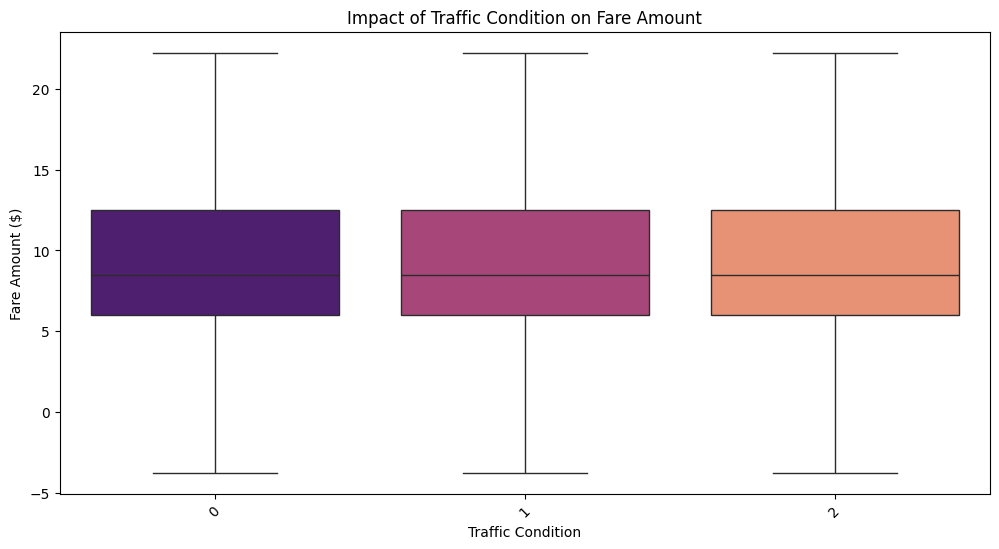

In [ ]:
# Boxplot for Fare Amount vs Traffic
plt.figure(figsize=(12, 6))
sns.boxplot(x="Traffic Condition", y="fare_amount", data=df, palette="magma")
plt.xlabel("Traffic Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Impact of Traffic Condition on Fare Amount")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['fare_amount'].describe()

,fare_amount
count,499995.000000
mean,10.083832
std,5.451940
min,-3.750000
25%,6.000000
50%,8.500000
75%,12.500000
max,22.250000


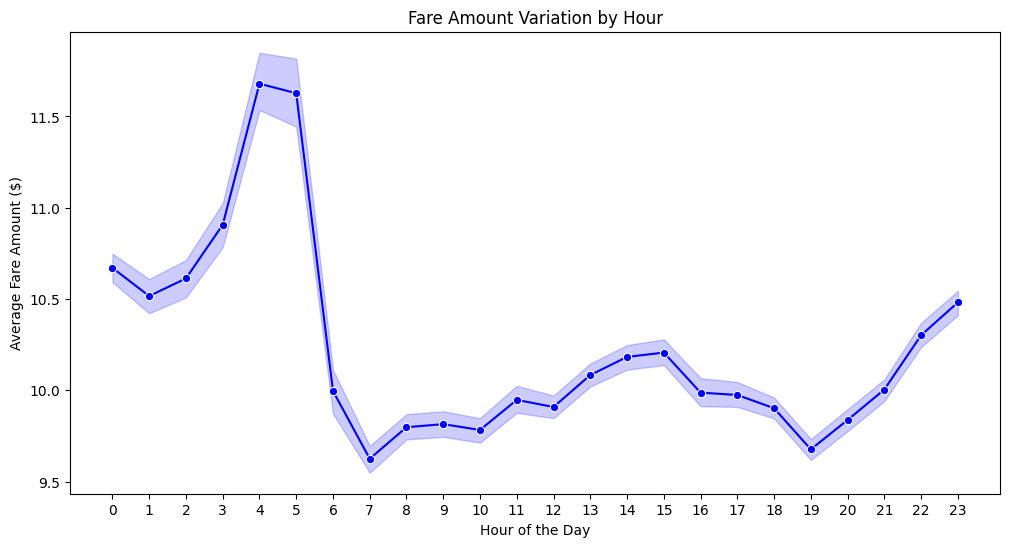

In [ ]:
# Line Plot for Hourly Fare Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="fare_amount", data=df, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Amount ($)")
plt.title("Fare Amount Variation by Hour")
plt.xticks(range(0, 24))
plt.show()

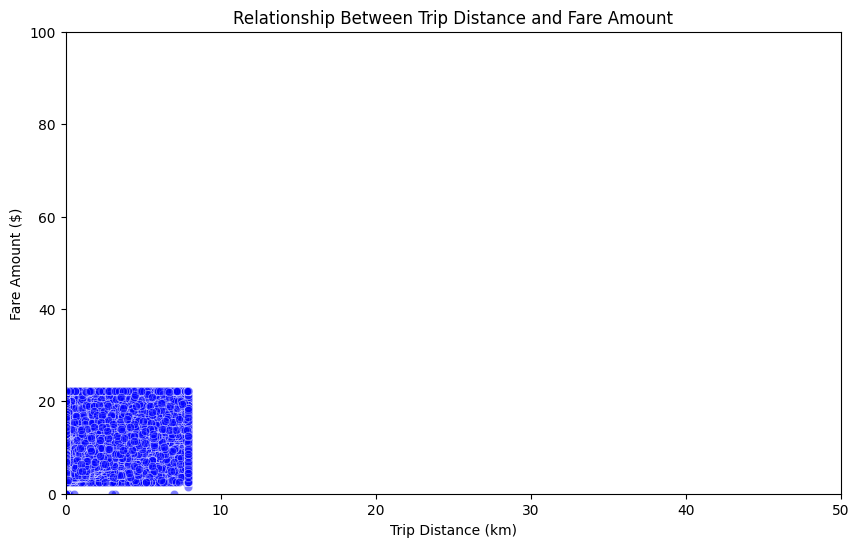

In [ ]:
# Scatter Plot for Distance vs Fare Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["distance"], y=df["fare_amount"], alpha=0.5, color="blue")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.show()

<ipython-input-171-532913a4390d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="passenger_count", y="fare_amount", data=df, palette="viridis")


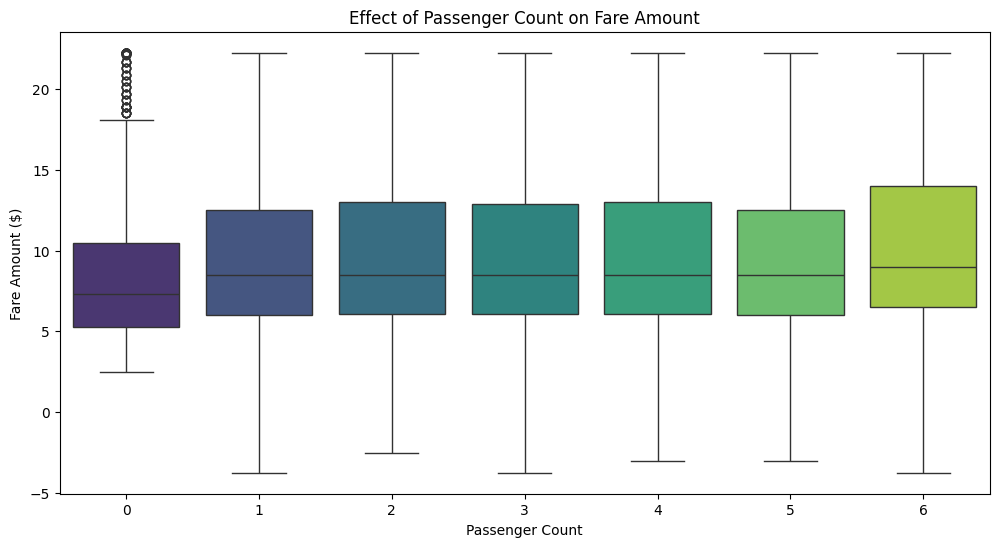

In [ ]:
# Impact of Passenger Count on Fare Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x="passenger_count", y="fare_amount", data=df, palette="viridis")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Effect of Passenger Count on Fare Amount")
plt.show()

<ipython-input-172-3e5965e85165>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Car Condition", y="fare_amount", data=df, palette="Set2")


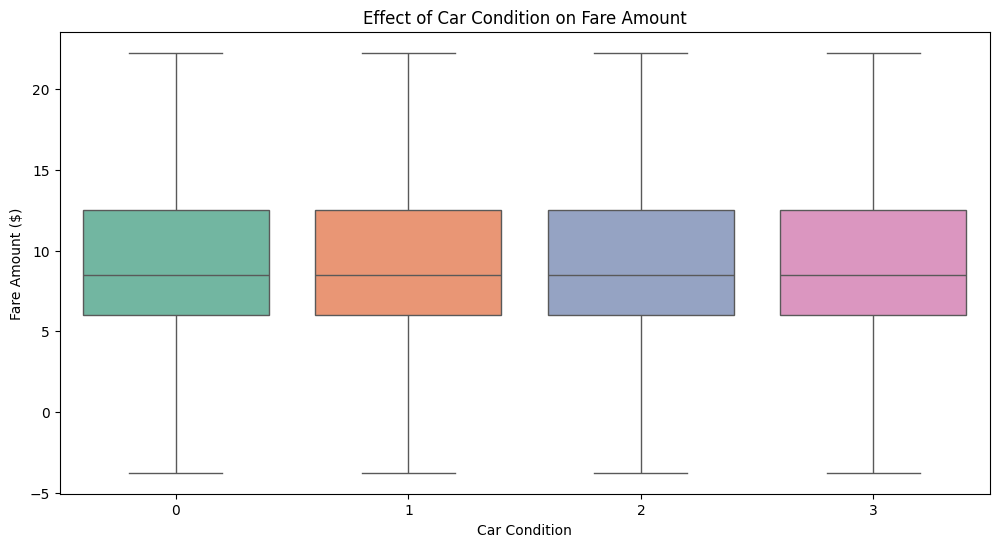

In [ ]:
# Impact of Car Condition on Fare Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x="Car Condition", y="fare_amount", data=df, palette="Set2")
plt.xlabel("Car Condition")
plt.ylabel("Fare Amount ($)")
plt.title("Effect of Car Condition on Fare Amount")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


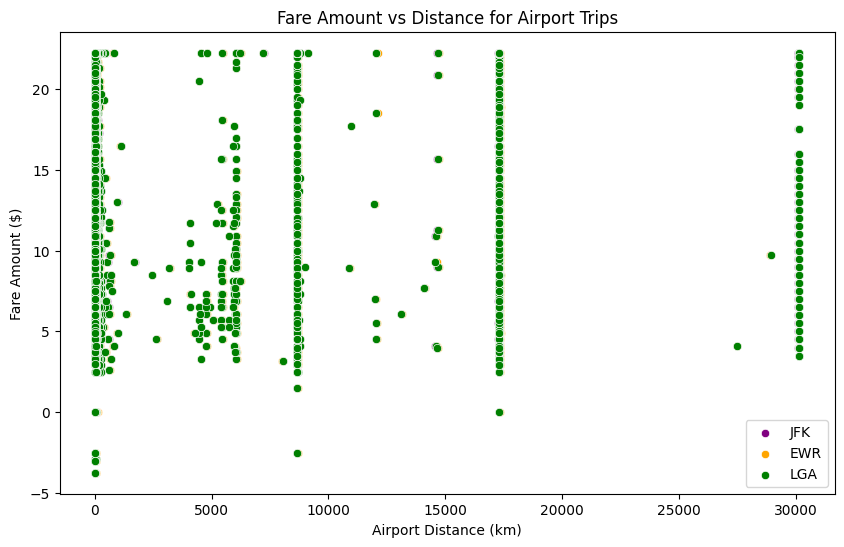

In [ ]:
# Distance vs Fare for Airport Trips
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["jfk_dist"], y=df["fare_amount"], color="purple", label="JFK")
sns.scatterplot(x=df["ewr_dist"], y=df["fare_amount"], color="orange", label="EWR")
sns.scatterplot(x=df["lga_dist"], y=df["fare_amount"], color="green", label="LGA")
plt.xlabel("Airport Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Distance for Airport Trips")
plt.legend()
plt.show()

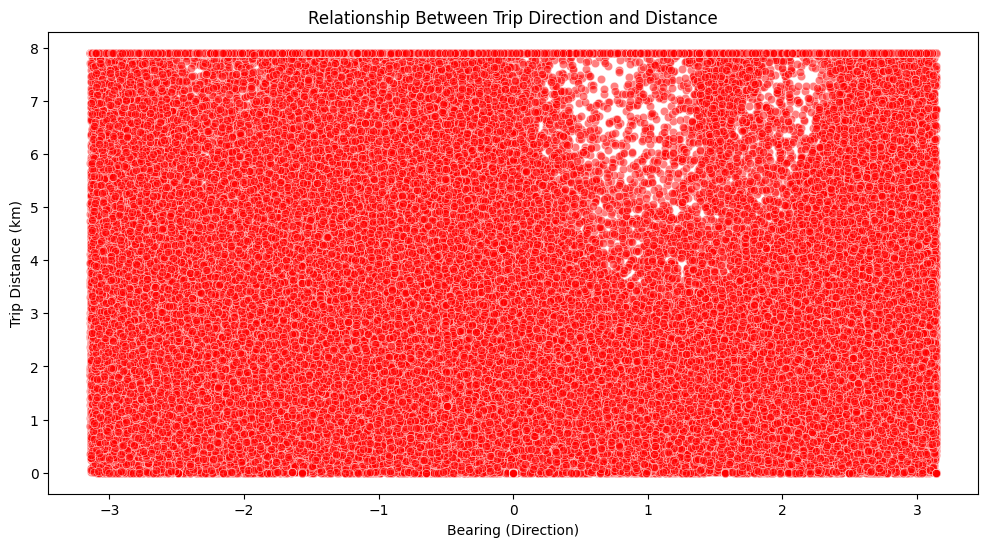

In [ ]:
# Effect of Bearing (Trip Direction) on Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["bearing"], y=df["distance"], alpha=0.5, color="red")
plt.xlabel("Bearing (Direction)")
plt.ylabel("Trip Distance (km)")
plt.title("Relationship Between Trip Direction and Distance")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
x = df['distance']
y = df['fare_amount']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train.values.reshape(-1, 1), y_train)



LinearRegression()

In [ ]:
y_pred = linear.predict(x_test.values.reshape(-1, 1))
y_pred

array([20.46861673,  8.02347986,  9.83858917, ...,  5.84752651,
        8.46600998, 10.20915771])

In [ ]:
# Evaluate the model
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7111027858424799
Mean Absolute Error: 1.9767342287700538
Mean Squared Error: 8.609700511303078
Root Mean Squared Error: 2.934229117043023


In [ ]:


# Fix for x_train shape
X1 = df.drop['fare_amount']# Put distance inside a list to create a DataFrame
y1 = df['fare_amount']
X_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Use LinearRegression, not LogisticRegression for regression task
linear = LinearRegression()
linear.fit(X_train, y_train)

# Make predictions
y_pred = linear.predict(x_test)

# Evaluate the model
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


TypeError: 'method' object is not subscriptable

In [ ]:

# 2. Train XGBoost Classifier
xgb_model = XGBClassifier( random_state=42)
xgb_model.fit(X_train, y_train)


# 3. Train Support Vector Machine Classifier (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


# 4. Train Logistic Regression Classifier
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


# 5. Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# --------- K-Nearest Neighbors (KNN) ---------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# ----------- AdaBoost --------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


# ---------- CatBoost Classifier---------
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, cat_features=[], random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

